In [1]:
import pandas as pd

In [2]:
drug_df = pd.read_csv('Data/drug200.csv')
drug_df = drug_df.sample(frac=1) # Randomizing the data
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
186,70,M,HIGH,HIGH,9.849,drugB
14,50,F,NORMAL,HIGH,12.703,drugX
27,49,F,NORMAL,NORMAL,9.381,drugX
199,40,F,LOW,NORMAL,11.349,drugX
178,39,M,NORMAL,HIGH,15.969,DrugY


In [3]:
from sklearn.model_selection import train_test_split
X = drug_df.drop('Drug', axis=1).values
y = drug_df.Drug.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

cat_col = [1, 2, 3]
num_col = [0, 4]

transform = ColumnTransformer(
    [
        ("encoder", OrdinalEncoder(), cat_col),
        ("num_imputer", SimpleImputer(strategy='median'), num_col),
        ("num_scaler", StandardScaler(), num_col),
    ]
)

pipe = Pipeline(
    steps=[
        ("preprocessin", transform),
        ("model", RandomForestClassifier(n_estimators=100, random_state=32)),
    ]
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessin',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=32))])

In [7]:
from sklearn.metrics import accuracy_score, f1_score

predictions = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='macro')

print("Accuracy:", str(round(accuracy, 2) * 100) + "%", "F1:", round(f1, 2))

Accuracy: 100.0% F1: 1.0


In [8]:
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {str(round(accuracy, 2) * 100)} %, F1 Score = {str(round(f1, 2))}.")

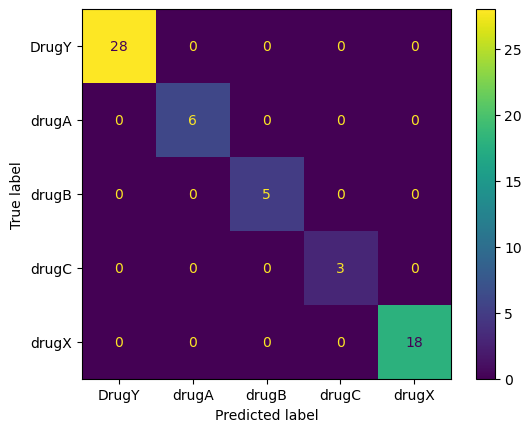

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()

plt.savefig("Results/model_results.png", dpi=120)

In [10]:
import skops.io as sio

sio.dump(pipe, "Model/drug_pipeline.skops")

In [12]:
unknown_types = sio.get_untrusted_types(file="./Model/drug_pipeline.skops")
sio.load("Model/drug_pipeline.skops", trusted=unknown_types)

Pipeline(steps=[('preprocessin',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=32))])